Gampley into frames

In [ ]:
import cv2

vidcap = cv2.VideoCapture('test_video/game.mp4')
success,image = vidcap.read()
count = 0
while success:
  cv2.imwrite("test/frame%d.jpg" % count, image)     # save frame as JPEG file      
  success,image = vidcap.read()
  print('Read a new frame: ', success)
  count += 1


Deep learning model

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import torch


import torchvision
from torchvision import datasets, transforms
#import helper
from pylab import *
from google.colab import drive

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

import gc

gc.collect()

torch.cuda.empty_cache()

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

drive.mount('/content/drive',force_remount=True)
data_path = '/content/drive/MyDrive/TFG_UNI/'

train_transforms = transforms.Compose([
                                
                               
                                transforms.RandomHorizontalFlip(),
                                transforms.ToTensor()])
test_transforms = transforms.Compose([
                                    
                                      transforms.ToTensor()])

train_data = datasets.ImageFolder('/content/drive/Shareddrives/datos_tfg/train',  
                                    transform=train_transforms)                                       

#test_data = datasets.ImageFolder( '/content/drive/MyDrive/TFG_ UNI/test', transform=test_transforms)

#Data Loading
trainloader = torch.utils.data.DataLoader(train_data,shuffle=True,
                                                   batch_size=8)
#testloader = torch.utils.data.DataLoader(test_data, batch_size=8)

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.conv3 = nn.Conv2d(16, 32, 5)
        
        self.fc1 = nn.Linear(32 * 263 * 473, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 2)

    def forward(self, x):
        #print(x.shape)
        x = self.pool(F.relu(self.conv1(x)))
        #print(x.shape)
        x = self.pool(F.relu(self.conv2(x)))
        x = F.relu(self.conv3(x))
        
        #print(x.shape)
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        #print(x.shape)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        
        x = self.fc3(x)
        return x


net = Net()
net.to(device)

import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

[1,     1] loss: 0.679
[1,   101] loss: 68.494
[1,   201] loss: 69.334
[1,   301] loss: 68.835
[1,   401] loss: 69.071
[1,   501] loss: 68.805
[1,   601] loss: 68.663
[1,   701] loss: 68.760
[1,   801] loss: 68.826
[1,   901] loss: 67.487
[1,  1001] loss: 68.508
[1,  1101] loss: 65.554


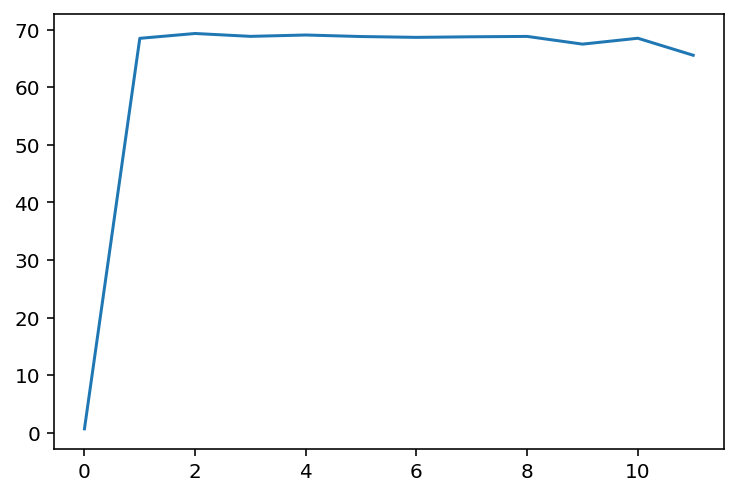

[2,     1] loss: 41.817
[2,   101] loss: 59.726
[2,   201] loss: 54.173
[2,   301] loss: 51.618
[2,   401] loss: 45.213
[2,   501] loss: 42.822
[2,   601] loss: 39.548
[2,   701] loss: 38.824
[2,   801] loss: 34.828
[2,   901] loss: 32.043
[2,  1001] loss: 33.187
[2,  1101] loss: 31.459


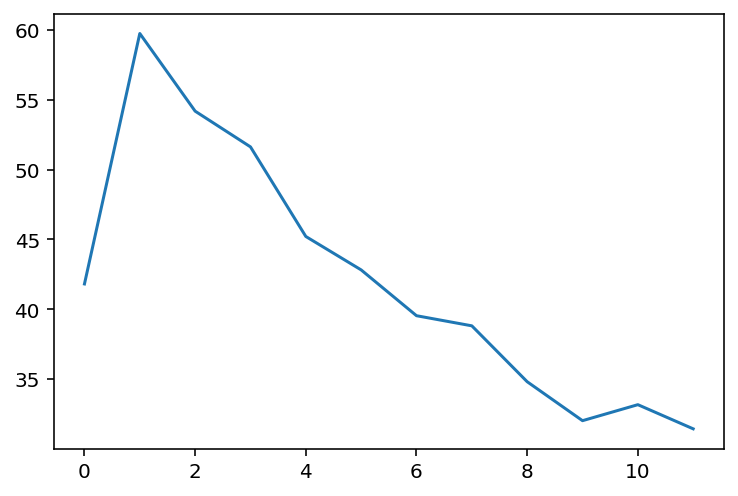

[3,     1] loss: 19.654
[3,   101] loss: 26.069
[3,   201] loss: 24.522
[3,   301] loss: 22.723
[3,   401] loss: 22.551
[3,   501] loss: 23.786
[3,   601] loss: 22.090
[3,   701] loss: 19.001
[3,   801] loss: 19.345
[3,   901] loss: 18.669
[3,  1001] loss: 20.278
[3,  1101] loss: 16.250


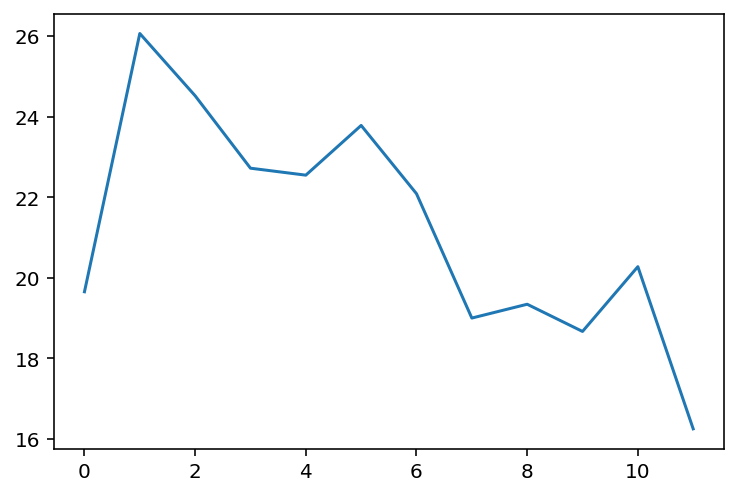

[4,     1] loss: 14.047
[4,   101] loss: 12.372
[4,   201] loss: 15.430
[4,   301] loss: 12.594
[4,   401] loss: 15.303
[4,   501] loss: 11.224
[4,   601] loss: 13.328
[4,   701] loss: 14.077
[4,   801] loss: 11.719
[4,   901] loss: 10.266
[4,  1001] loss: 13.269
[4,  1101] loss: 13.925


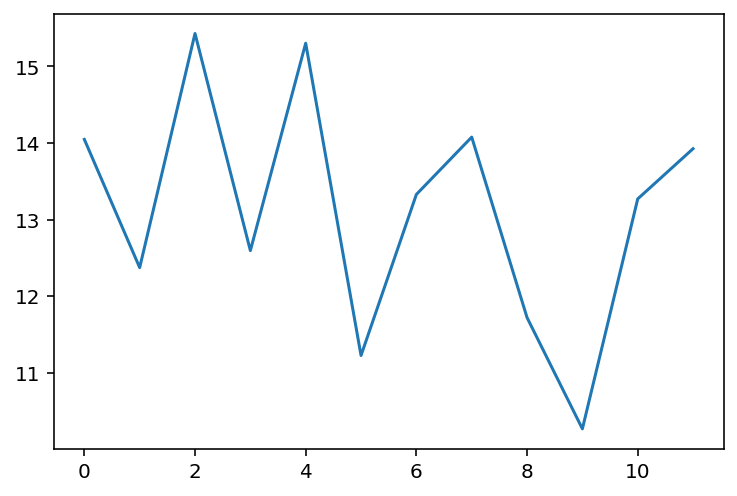

[5,     1] loss: 6.566
[5,   101] loss: 7.746
[5,   201] loss: 5.602
[5,   301] loss: 9.249
[5,   401] loss: 5.937
[5,   501] loss: 7.515
[5,   601] loss: 9.204
[5,   701] loss: 8.194
[5,   801] loss: 9.011
[5,   901] loss: 9.652
[5,  1001] loss: 8.862
[5,  1101] loss: 9.097


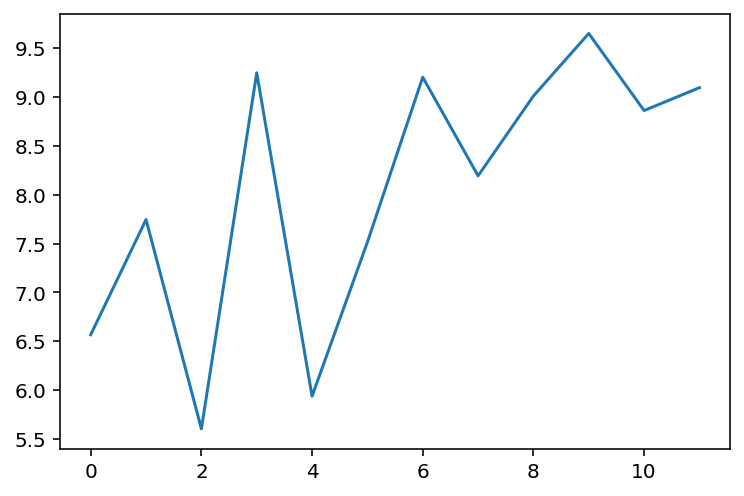

[6,     1] loss: 3.743
[6,   101] loss: 4.724
[6,   201] loss: 5.426
[6,   301] loss: 6.099
[6,   401] loss: 3.524
[6,   501] loss: 4.949
[6,   601] loss: 8.351
[6,   701] loss: 5.485
[6,   801] loss: 5.855
[6,   901] loss: 6.295
[6,  1001] loss: 5.743
[6,  1101] loss: 7.491


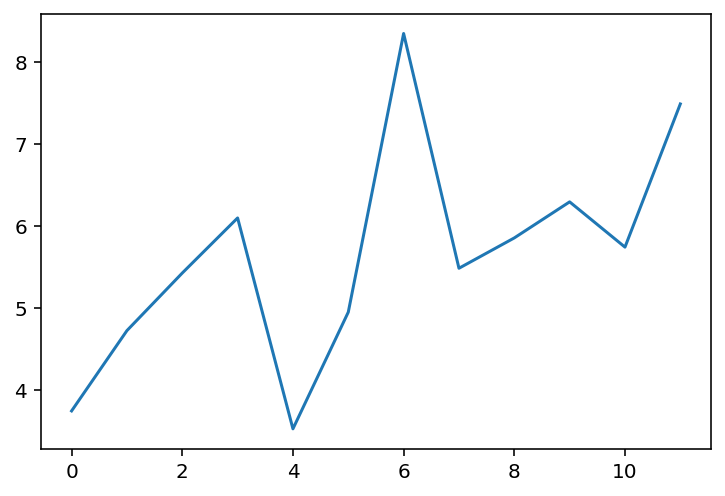

[7,     1] loss: 2.341
[7,   101] loss: 4.628
[7,   201] loss: 3.275
[7,   301] loss: 2.409
[7,   401] loss: 4.808
[7,   501] loss: 3.242
[7,   601] loss: 3.951
[7,   701] loss: 4.806
[7,   801] loss: 3.416
[7,   901] loss: 3.142
[7,  1001] loss: 2.804
[7,  1101] loss: 2.832


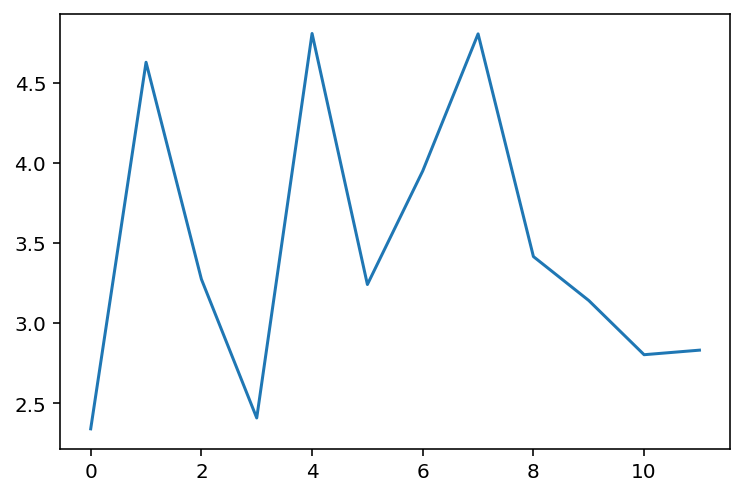

[8,     1] loss: 1.968
[8,   101] loss: 2.775
[8,   201] loss: 2.990
[8,   301] loss: 3.014
[8,   401] loss: 2.258
[8,   501] loss: 3.682
[8,   601] loss: 2.604
[8,   701] loss: 3.015
[8,   801] loss: 5.538
[8,   901] loss: 2.419
[8,  1001] loss: 2.427
[8,  1101] loss: 2.464


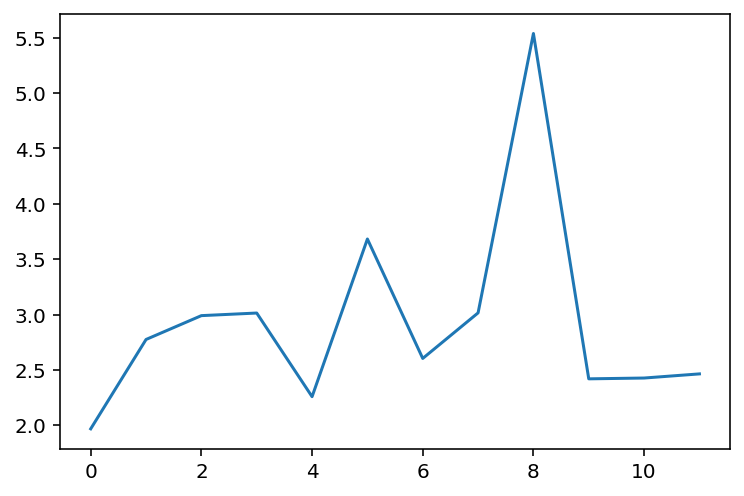

Finished Training


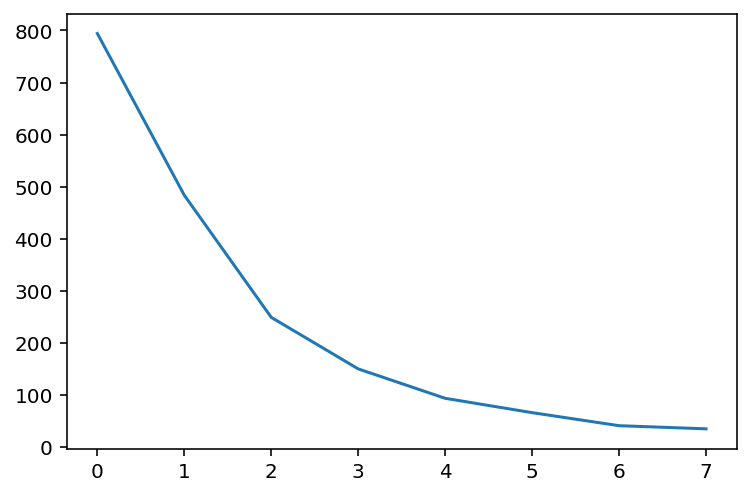

In [ ]:
epochs_rate=[]
running_loss = 0.0
for epoch in range(8):  # loop over the dataset multiple times
    error=[]
    error_epoch=0
    for i, data in enumerate(trainloader, 0):
        
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        error_epoch += loss.item()
       
        
        if i % 100 == 0:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss ))
            error.append(running_loss)
            running_loss = 0.0
        
    epochs_rate.append(error_epoch)
        
    plt.plot(error)
    plt.show()
    
print('Finished Training')
plt.plot(epochs_rate)
plt.show()

In [ ]:
classes = ('cheater','normal')
correct = 0
total = 0
cheater_=0
normal_=0
predicted_c=0
predicted_n=0
false_neg=0
false_pos=0
true_neg=0
true_pos=0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in trainloader:
        images, labels =data[0].to(device), data[1].to(device)
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        for i in range(len(predicted)):
          if labels[i]==0:
            cheater_=cheater_+1
          else:
            normal_=normal_+1
          if predicted[i]==0:
            predicted_c=predicted_c+1
          else:
            predicted_n=predicted_n+1
          
          if labels[i]==0 and predicted[i]==1:
            false_neg=false_neg+1
          elif labels[i]==1 and predicted[i]==0:
            false_pos=false_pos+1
          elif labels[i]==0 and predicted[i]==0:
            true_pos=true_pos+1
          elif labels[i]==1 and predicted[i]==1:
            true_neg=true_neg+1

print("precision")
print(true_pos/(true_pos+false_pos))
print(true_neg/(true_neg+false_neg))

print("recall")
print(true_pos/(true_pos+false_neg))
print(true_neg/(true_neg+false_pos))

print('Accuracy of the network on the train images: %d %%' % (
    100 * correct / total))

In [ ]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[prediction]] += 1



print("total cheaters")
print(total_pred[0])

print("total normal")
print(total_pred[1])


if (total_pred[0]> (total_pred[0]+total_pred[1])*0.05 ):
  print("cheater player")
else:
  print("normal player")
   